## Using docs parsed from BBC as sample input

In [10]:
url = 'https://www.bbc.com/news/world-europe-61370906'

In [11]:
import requests
import urllib
from bs4 import BeautifulSoup

In [12]:
def getHTML(url):
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    send_request = urllib.request.Request(url, headers=headers)
    page = urllib.request.urlopen(send_request)
    return page

In [13]:
html = getHTML(url)

In [14]:
page_source = BeautifulSoup(html.read(), 'html.parser')

In [15]:
text1 = ' '.join([i.text for i in page_source.find_all('p')])
text1.strip()

'This video can not be played Ukrainian President Volodymyr Zelensky has accused Russia of implementing "a bloody reconstruction of Nazism". In a speech commemorating World War Two, he said the Russian army was replicating Nazi "atrocities" during its invasion of his country. "Darkness has returned to Ukraine and it has become black and white again," he said in his video address.  Footage in the video showed the Ukrainian leader against a backdrop of destroyed residential buildings. "Evil has returned, in a different uniform, under different slogans, but for the same purpose," he added.  The video also featured archive footage of World War Two and black-and-white footage of Russia\'s invasion. When Ukraine was invaded by Russia in late February, Moscow maintained its operation was in part to "de-Nazify" the country. Russian President Vladimir Putin returned to the theme in his own address congratulating former Soviet nations on the 77th anniversary of Nazi Germany\'s defeat, saying tha

In [16]:
text2 = 'US President Joe Biden has accused Russian forces of committing acts of genocide in Ukraine. \
He said Russian President Vladimir Putin was trying to "wipe out the idea" of a Ukrainian identity. \
The US has historically been reluctant to use the word genocide due to a duty to intervene if the term is used.\
French President Emmanuel Macron later said he was reluctant to use the word. The Kremlin called Mr Biden\'s comments "unacceptable". But Mr Biden insisted on\
Tuesday night that evidence of genocidal acts by Russian troops was mounting. He first made the comments as part of a throwaway remark during a speech in Iowa about increasing inflation,\
telling supporters in Iowa their ability to budget should not "hinge on whether a dictator declares war and commits genocide half a world away".\
Speaking to the public broadcaster France 2, the President Macron said he would be "careful with such terms today because these two peoples are brothers."\
"I want to continue to try, as much as I can, to stop this war and rebuild peace. I am not sure that an escalation of rhetoric serves that cause," he added.\
The Kremlin said Mr Biden was attempting to "distort the situation" in Ukraine.\
"This is hardly acceptable from a president of the United States, a country that has committed well-known \
crimes in recent times," Kremlin spokesperson Dmitry Peskov said on a conference call with reporters.'

In [17]:
#!pip install svgling

In [18]:
import pandas as pd

In [19]:
amazon_reviewDF = pd.read_csv('./Amazon_review.csv', delimiter=',', header=None)

In [20]:
amazon_reviewDF.columns = ['text', 'label']; amazon_reviewDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,Positive
1,The best soundtrack ever to anything.: I'm rea...,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive


## NER 命名實體識別
- **NLTK ner**
- **Stanford ner**

### NLTK ner

In [21]:
import re
import pandas as pd
import nltk

In [22]:
def parse_document(doc):
    doc = re.sub('\n', ' ', doc)
    doc = re.sub('"', ' ', doc)
    if isinstance(doc, str):
        doc = doc
    else:
        raise ValueError('Document is not string.')
    
    # remove the white space from top till the end
    doc = doc.strip()
    # splitting sentences
    sentences = nltk.sent_tokenize(doc)
    sentences = [sentence.strip() for sentence in sentences]
    
    return sentences

In [23]:
# tokenize sentences
sentences = parse_document(text1)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tokenized_sentences[0]

['This',
 'video',
 'can',
 'not',
 'be',
 'played',
 'Ukrainian',
 'President',
 'Volodymyr',
 'Zelensky',
 'has',
 'accused',
 'Russia',
 'of',
 'implementing',
 'a',
 'bloody',
 'reconstruction',
 'of',
 'Nazism',
 '.']

In [24]:
# tagged sentences and use nltk named entity chunker
# nltk.pos_tag: 詞性標籤
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
ne_chunk_sents = [nltk.ne_chunk(tagged) for tagged in tagged_sentences]

(S
  This/DT
  video/NN
  can/MD
  not/RB
  be/VB
  played/VBN
  (GPE Ukrainian/JJ)
  President/NNP
  (PERSON Volodymyr/NNP Zelensky/NNP)
  has/VBZ
  accused/VBN
  (GPE Russia/NNP)
  of/IN
  implementing/VBG
  a/DT
  bloody/JJ
  reconstruction/NN
  of/IN
  (GPE Nazism/NNP)
  ./.)


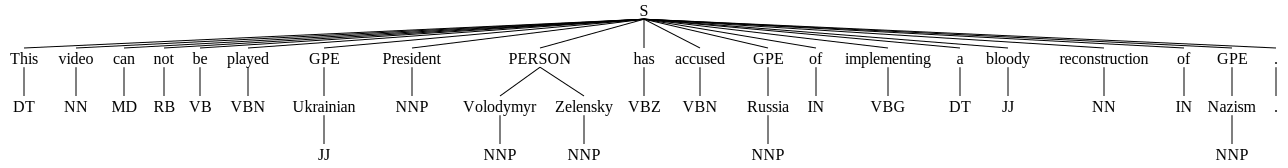

In [25]:
print(nltk.ne_chunk(tagged_sentences[0]))
nltk.ne_chunk(tagged_sentences[0])

In [26]:
print(' '.join([i[0] for i in ne_chunk_sents[0].leaves()]))
ne_chunk_sents[5].label()

This video can not be played Ukrainian President Volodymyr Zelensky has accused Russia of implementing a bloody reconstruction of Nazism .


'S'

In [27]:
# extract all named entites
named_entities = []
for ne_tagged_sentences in ne_chunk_sents:
    # ne_tagged_sentences is a tree
    
    for tagged_tree in ne_tagged_sentences:
        # tagged_tree is either a tree or a tuple with words and its ner
        # I only extract chunks having NE labels
        
        if hasattr(tagged_tree, 'label'): # if tagged tree has an attr name called 'label'
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves())
            entity_type = tagged_tree.label() # get NE category
            named_entities.append((entity_name, entity_type))

            # get unique named entities
            named_entities = list(set(named_entities))
            
# store named entities in a data frame
entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])
entity_frame

,Entity Name,Entity Type
0,Ukrainian,GPE
1,Vladimir Putin,PERSON
2,Indigenous Australians,ORGANIZATION
3,Darren Conway,PERSON
4,France,GPE
5,European,GPE
6,Victory,PERSON
7,India,GPE
8,Russia,GPE
9,Ukraine,PERSON


**可以看出，NLTK中的任務大致上有成功識別出一些國家地域及人名，但仍有很多不太如人意之處。**

### Stanford ner

In [28]:
import re
from nltk.tag import StanfordNERTagger
import os
import pandas as pd
import nltk

In [29]:
def parse_doc(doc):
    doc = re.sub('\n', ' ', doc)
    if isinstance(doc, str):
        pass
    else:
        raise ValueError('Doc is not a string.')
        
    doc = doc.strip()
    sentences = nltk.sent_tokenize(doc)
    sentences = [sentence.strip() for sentence in sentences]
    
    return sentences


sentences = parse_doc(text1)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

java_path = 'C:\\Program Files\\Java\\jdk-18.0.1.1\\bin\\java.exe'
os.environ['JAVAHOME'] = java_path
# load stanford NER
sn = StanfordNERTagger('D:\\stanford-ner-2017-06-09\\stanford-ner-2017-06-09\\classifiers\\english.muc.7class.distsim.crf.ser.gz',
                       path_to_jar='D:\\stanford-ner-2017-06-09\\stanford-ner-2017-06-09\\stanford-ner.jar')
# tag sentence
ne_annotated_sentence = [sn.tag(sentence) for sentence in tokenized_sentences]

named_entity_frame=[]
# extract named entities
for term_tag in ne_annotated_sentence:
    
    temp_entity_name=''
    temp_named_entity = None
    
    for term, tag in term_tag:
        # get terms with NE tags
        if tag != 'O':
            temp_entity_name = ' '.join([temp_entity_name, term]).strip() # combining NE tagged terms into a sentence
            temp_named_entity = (temp_entity_name, tag) # get NE and its category
        else:
            if temp_named_entity:
                named_entity_frame.append(temp_named_entity)
                temp_entity_name=''
                temp_named_entity = None

# get unique named entities
named_entity_frame = list(set(named_entity_frame))
named_entity_frame = pd.DataFrame(named_entity_frame, columns=['Entity Name', 'Entity Type'])

named_entity_frame

,Entity Name,Entity Type
0,Bilohorivka,LOCATION
1,Vladimir Putin,PERSON
2,Africa,LOCATION
3,Ukraine,LOCATION
4,Darren Conway,PERSON
5,Nazi Germany,LOCATION
6,Putin,PERSON
7,Europe,LOCATION
8,1945,DATE
9,Australia,LOCATION


**實作兩個NER可以看出在Stanford NER的幫助下，命名實體識別的效果較佳，但這並不是說Stanford NER一定會比NLTK NER的效果好! 因為兩者的演算法有所差異，因此需要根據自己的需求去決定使用什麼工具。**

## Spacy

- **Spacy的統計模型**
- **Spacy的處理管道**

模型是spacy的核心，spacy會利用這些模型執行一些與NLP相關的任務。

In [30]:
import spacy

# 不去 load spacy model中兩個套件: parser(解析器), ner(命名實體識別), ...
nlp = spacy.load('en_core_web_sm', disable=['parser','attribute_ruler', 'lemmatizer'])

建立NLP物件

In [31]:
doc = nlp('He wants to play basketball.'); doc

He wants to play basketball.

找出活動的管道元件

In [32]:
nlp.pipe_names # functions of spacy model

['tok2vec', 'tagger', 'ner']

In [33]:
# 禁用管道元件
nlp.disable_pipes('tagger'); nlp.pipe_names

['tok2vec', 'ner']

### 1. 詞性標註

In [34]:
nlp = spacy.load('en_core_web_sm')

# create a nlp object
doc = nlp(text1)

# tokenized
for token in doc:
    print(token.text, "-->", token.pos_)

This --> DET
video --> NOUN
can --> AUX
not --> PART
be --> AUX
played --> VERB
Ukrainian --> ADJ
President --> PROPN
Volodymyr --> PROPN
Zelensky --> PROPN
has --> AUX
accused --> VERB
Russia --> PROPN
of --> ADP
implementing --> VERB
" --> PUNCT
a --> DET
bloody --> ADJ
reconstruction --> NOUN
of --> ADP
Nazism --> PROPN
" --> PUNCT
. --> PUNCT
In --> ADP
a --> DET
speech --> NOUN
commemorating --> VERB
World --> PROPN
War --> PROPN
Two --> PROPN
, --> PUNCT
he --> PRON
said --> VERB
the --> DET
Russian --> ADJ
army --> NOUN
was --> AUX
replicating --> VERB
Nazi --> PROPN
" --> PUNCT
atrocities --> NOUN
" --> PUNCT
during --> ADP
its --> PRON
invasion --> NOUN
of --> ADP
his --> PRON
country --> NOUN
. --> PUNCT
" --> PUNCT
Darkness --> NOUN
has --> AUX
returned --> VERB
to --> ADP
Ukraine --> PROPN
and --> CCONJ
it --> PRON
has --> AUX
become --> VERB
black --> ADJ
and --> CCONJ
white --> ADJ
again --> ADV
, --> PUNCT
" --> PUNCT
he --> PRON
said --> VERB
in --> ADP
his --> PRON
vid

In [35]:
spacy.explain('PROPN')

'proper noun'

### 2. 依存句法分析

In [36]:
for token in doc:
    print(token.text, "-->", token.dep_)

This --> det
video --> nsubjpass
can --> aux
not --> neg
be --> auxpass
played --> ROOT
Ukrainian --> amod
President --> compound
Volodymyr --> compound
Zelensky --> nsubj
has --> aux
accused --> conj
Russia --> dobj
of --> prep
implementing --> pcomp
" --> punct
a --> det
bloody --> amod
reconstruction --> dobj
of --> prep
Nazism --> pobj
" --> punct
. --> punct
In --> prep
a --> det
speech --> pobj
commemorating --> acl
World --> compound
War --> compound
Two --> dobj
, --> punct
he --> nsubj
said --> ROOT
the --> det
Russian --> amod
army --> nsubj
was --> aux
replicating --> ccomp
Nazi --> nmod
" --> punct
atrocities --> dobj
" --> punct
during --> prep
its --> poss
invasion --> pobj
of --> prep
his --> poss
country --> pobj
. --> punct
" --> punct
Darkness --> nsubj
has --> aux
returned --> ccomp
to --> prep
Ukraine --> pobj
and --> cc
it --> nsubj
has --> aux
become --> conj
black --> acomp
and --> cc
white --> conj
again --> advmod
, --> punct
" --> punct
he --> nsubj
said --> R

In [37]:
print(spacy.explain('amod'),"|", spacy.explain('dobj'),"|",spacy.explain('nsubjpass'))

adjectival modifier | direct object | nominal subject (passive)


### 3. NER

In [38]:
doc = nlp(text1)

In [39]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Ukrainian NORP
Volodymyr Zelensky PERSON
Russia GPE
Nazism NORP
World War Two EVENT
Russian NORP
Nazi NORP
Ukraine GPE
Ukrainian NORP
World War Two EVENT
Russia GPE
Ukraine GPE
Russia GPE
late February DATE
Moscow GPE
Russian NORP
Vladimir Putin PERSON
Soviet NORP
the 77th anniversary DATE
Nazi Germany's GPE
1945 DATE
Russia GPE
Russia GPE
Monday DATE
Zelensky PERSON
European NORP
UK GPE
France GPE
Netherlands GPE
Nazi NORP
Russian NORP
Ukraine GPE
more than 60 CARDINAL
Russian NORP
Ukraine GPE
Saturday DATE
Ukraine GPE
Luhansk GPE
Serhiy Haidai PERSON
around 90 CARDINAL
Bilohorivka GPE
Donbas GPE
Nazi ORG
Russian NORP
Ukraine GPE
Sweden GPE
Nato ORG
Buffalo ORG
second ORDINAL
Australians NORP
Russian NORP
Urdu GPE
India GPE
Africa LOC
Russian NORP
Europe LOC
Australia GPE
two CARDINAL
Russia GPE
Quentin Sommerville PERSON
Darren Conway PERSON
Ukrainian NORP
Russia GPE
Ukraine - Putin GPE
Russian NORP
Ukraine GPE
Nazi NORP
Germany GPE
Putin PERSON
Russian NORP
2022 ORG
BBC ORG
BBC ORG


### 4. Spacy 匹配

In [40]:
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher

In [41]:
# 用 spacy詞彙表初始化 matcher
matcher = Matcher(nlp.vocab)

In [42]:
doc = nlp(text1)

In [43]:
# define the rules
pattern = [{'TEXT': 'Ukraine'}, {'TEXT':'war'}, {'POS':'NOUN'}]

In [44]:
# add new rules
matcher.add('rule_1', [pattern])

In [45]:
matches = matcher(doc); matches
# 匹配ID, 標記位置

[]

**目標是提取'lemon water'這個短語**

In [46]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

## Tqdm basics

In [47]:
from tqdm import tqdm
from time import sleep
from tqdm import trange

In [48]:
for i in tqdm(range(10)):
    sleep(0.1)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.21it/s]


In [49]:
for i in trange(100):
    sleep(0.1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.06it/s]


In [50]:
pbar = tqdm(['a','b','c','d'])
for char in pbar:
    pbar.set_description(f"Process {char}")
    sleep(1)

Process d: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.01s/it]


## Gensim Word2Vec

There are two types of input you can feed into Word2Vec.
- 1D list: [ ' My name is Megan ' ,  ' Nice to meet you. ' ]
> [ ' M ' , ' y ' , ' n ' , ' a ' ... ]
- 2D list: [ [ ' My name is Megan ' ] ,  [ ' Nice to meet you. ' ] ]
> [ ' My ' , ' name ' , ' is ' ... ]

In [51]:
!pip install gensim

In [52]:
from gensim.models.word2vec import Word2Vec

In [53]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# initialize a model
sentences = [nltk.wordpunct_tokenize(word) for word in nltk.sent_tokenize(text1)]
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)
model.save('word2vec.model')

# Note that sentences must be restartable, not just a generator, to allow the algorithm to stream over your data set.

In [54]:
nlp(text1)

This video can not be played Ukrainian President Volodymyr Zelensky has accused Russia of implementing "a bloody reconstruction of Nazism". In a speech commemorating World War Two, he said the Russian army was replicating Nazi "atrocities" during its invasion of his country. "Darkness has returned to Ukraine and it has become black and white again," he said in his video address.  Footage in the video showed the Ukrainian leader against a backdrop of destroyed residential buildings. "Evil has returned, in a different uniform, under different slogans, but for the same purpose," he added.  The video also featured archive footage of World War Two and black-and-white footage of Russia's invasion. When Ukraine was invaded by Russia in late February, Moscow maintained its operation was in part to "de-Nazify" the country. Russian President Vladimir Putin returned to the theme in his own address congratulating former Soviet nations on the 77th anniversary of Nazi Germany's defeat, saying that "

In [55]:
model = Word2Vec.load('word2vec.model')
model.train([['hello', 'world'], ['I love you']], total_examples=1, epochs=1)

(0, 3)

In [56]:
# get numpy word vector
# the trained word vectors are stored in a KeyedVectors instance (model.wv)
vector = model.wv['fear']

# get another similar words
similarities = model.wv.most_similar('fear', topn=10)

In [57]:
similarities

[('Quentin', 0.26901254057884216),
 ('life', 0.2582971453666687),
 ('ours', 0.2448005974292755),
 ('also', 0.23192386329174042),
 ('residential', 0.2312617301940918),
 ('Sommerville', 0.20403794944286346),
 ('defeat', 0.18168693780899048),
 ('Europe', 0.18113252520561218),
 ('leader', 0.1755145639181137),
 ('appealed', 0.16737128794193268)]

**The reason for seperating the trained vectors into *KeyedVectors* is that if you don't need to continue training, the model state can be discarded, keeping just the vectors and their keys proper.**

In [58]:
from gensim.models import KeyedVectors

# store just the words + their trained embeddings.
word_vect = model.wv
word_vect.save('word2vec.wordvectors')

# Load back with memory-mapping, shared across processes
wv = KeyedVectors.load('word2vec.wordvectors', mmap='r')
vector = wv['fear'] # get the numpy vector of "fear"

vector

array([ 0.00245672,  0.00603815, -0.00967525, -0.00141643,  0.00512494,
        0.00709658,  0.00687273,  0.00267384,  0.00682325, -0.00888664,
        0.00534703, -0.00254393,  0.00373437, -0.00959953, -0.00903777,
        0.00498094, -0.00116856,  0.007398  , -0.00933765,  0.0098441 ,
       -0.00597251,  0.00053171,  0.00463508, -0.00218624,  0.0073464 ,
        0.00049369, -0.00298038, -0.00118586, -0.00948384, -0.00415619,
       -0.00393587,  0.00825014, -0.00999267, -0.00215082,  0.0073504 ,
        0.00794078, -0.00848447,  0.00126483, -0.00933387,  0.00684145,
        0.0095866 ,  0.00327328, -0.00941152, -0.00059756, -0.00174051,
        0.00432746,  0.00696998,  0.0044567 , -0.00923279,  0.00738247,
        0.0027651 , -0.00080843, -0.00289296,  0.0006086 , -0.00568433,
        0.00530166, -0.00903948,  0.00029373,  0.00228392,  0.00245247,
        0.00908578, -0.00528315,  0.00965737,  0.00946033, -0.00720558,
        0.00274826,  0.00971554,  0.00304767, -0.00223885,  0.00

In [59]:
del model

## Skip-gram and CBOW

**Word2Vec 提出兩種演算法。
- Skip-gram

利用中心詞來預測上下文。假定「柯文哲」為model input，輸出為固定的window長度的上下文詞彙，例如台北、市長、選舉...
> negative sampling: 與其提供大量非上下文詞彙提供模型訓練，不如挑選少樣負面案例
- CBOW

利用上下文來預測中心詞，「台北」、「市長」、「參加」為model input -> 中心詞: 柯文哲
> heirarchical softmax: 快速縮短訓練時間，將輸出層利用huffman coding建立二元樹，時間複雜度從O(n)降到O(log(n))

## PCA - Principal Component Analysis

**PCA是一種非監督式的學習，主要用於降維，可以用來過濾雜訊、特徵擷取等等。**

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

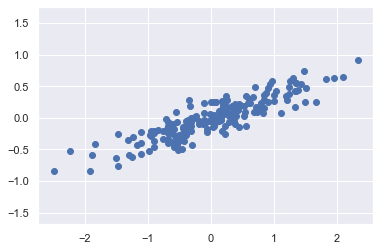

In [61]:
rng = np.random.RandomState(1); rng
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1]);
plt.axis('equal');

**PCA unsupervised learning 是學習X-axis 及y-axis的關係，並非由X軸的資料去預測y軸的資料。**

>Linear dimensionality reduction using `Singular Value Decomposition` of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [63]:
print('variance ratio: ', pca.explained_variance_ratio_,
      '\nsingular value: ', pca.singular_values_)

variance ratio:  [0.97634101 0.02365899] 
singular value:  [12.31843207  1.91757691]


# Implementation

In [64]:
# if lemmatize == True: lemmatize the sentence and then store it to text_preprocessing
# if pos == Ture: add text only if the name entity is in the pos selected list.

def spacy_process(text, lemma=True, pos=True, pos_select=['VERB', 'NOUN', 'ADV', 'PART']):
    text = re.sub('\n', ' ', text)
    text = re.sub('\'s', ' ', text)
    
    nlp = spacy.load('en_core_web_sm')
    nlp.disable_pipes('parser', 'ner')
    
    doc = nlp(text)
    
    if pos == False:
        if lemma == True:
            text_preprocessing = " ".join([token.lemma_ for token in doc])
        if lemma == False:
            text_preprocessing = " ".join([token.text for token in doc])
    elif pos == True:
        if lemma == True:
            text_preprocessing = " ".join([token.lemma_ for token in doc if token.pos_ in pos_select])
        if lemma == False:
            text_preprocessing = " ".join([token.text for token in doc if token.pos_ in pos_select])
           
    # text_preprocessing is now including text stemmed from the specified pos_select.
    return text_preprocessing

In [65]:
spacy_process(text1)

'video not play accuse implement reconstruction speech commemorate say army replicate atrocity invasion country darkness return become again say video address video show leader backdrop destroy building evil return uniform slogan purpose add video also feature archive footage footage invasion invade maintain operation part nazify country return theme address congratulate nation anniversary defeat say victory official fear step attack ahead commemoration appeal nation include liken bombing town city strike area meanwhile people fear bomb hit school authority say governor region say around resident shelter school village frontline region then also try not to watch occupy city war return place father kill confirm apply to join child camp become execution ground gunman plan attack police say want election videowhat want election pin fire frontline village language draw ire ’s wing child camp become execution ground replace gas supply become country jet set plane use soar tale woman ’s murd

In [66]:
import os
from tqdm.notebook import tqdm

In [67]:
tqdm(amazon_reviewDF.index)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [68]:
destination_path = './Amazon review cleaned.csv'

if not os.path.isfile(destination_path):
    cleaned_review_data = amazon_reviewDF
    
    for index in tqdm(amazon_reviewDF.index):
        sentence = amazon_reviewDF.text[index]
        # clean
        cleaned_sentence = spacy_process(sentence, pos_select=['VERB', "ADJ", "ADV"])
        cleaned_review_data.text[index] = cleaned_sentence
    
    cleaned_review_data.to_csv(destination_path, index=False)
else:
    print('File already exists.');
    cleaned_review_data = pd.read_csv(destination_path)

File already exists.


**Now I have 2 data set:**
1. the original data set: amazon_reviewDF
2. After spacy processing: cleaned_review_data

In [69]:
# removing na
cleaned_review_data = pd.read_csv(destination_path, delimiter=',')
cleaned_review_data.isna().sum()
cleaned_review_data.dropna(inplace=True)
cleaned_review_data.isna().sum()

text     0
label    0
dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
# splitting training and testing data for validation

train_x, test_x, train_y, test_y = train_test_split(cleaned_review_data.text,
                                                    cleaned_review_data.label, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [71]:
from sklearn.preprocessing import LabelEncoder
# encode the target variable (pos, neg) to be (1, 0)

encoder = LabelEncoder()

train_y_en = encoder.fit_transform(train_y)
test_y_en = encoder.fit_transform(test_y)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=None)

    # learn vocab and idf from the training set
tfidf_vect.fit(train_x.values.astype('U'))

    # transfer into dtpyr: <U400
xtrain_tfidf = tfidf_vect.transform(train_x.values.astype('U'))
xtest_tfidf = tfidf_vect.transform(test_x.values.astype('U'))

In [73]:
xtrain_tfidf.shape, xtest_tfidf.shape, len(train_y_en), len(test_y_en)

((6992, 6103), (2997, 6103), 6992, 2997)

**Try to use Gensim**

In [74]:
import gensim
import multiprocessing
import sys

In [75]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

workers = multiprocessing.cpu_count()
print(f'num of cpu: {workers}')
assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise."

num of cpu: 8


In [76]:
corpus = []
for idx in train_x.values:
    corpus.append(nltk.word_tokenize(idx))

corpus

[['cheap',
  'buy',
  'cheap',
  'lose',
  'simple',
  'enough',
  'together',
  'want',
  'play',
  'very',
  'quick',
  'top',
  'few',
  'think',
  'too',
  'rough',
  'back'],
 ['real', 'receive', 'respond', 'quickly', 'tell', 'sell', 'fraudulent'],
 ['poor',
  'poorly',
  'make',
  'consist',
  'low',
  'flimsy',
  'assemble',
  'go',
  'come',
  'apart',
  'require',
  'considerable',
  'safely',
  'effectively',
  'outrageously',
  'overprice',
  'too',
  'unfortunate',
  'legendary',
  'original',
  'perhaps',
  'handy',
  'ever',
  'manage',
  'though',
  'get',
  'even'],
 ['favorite',
  'other',
  'full',
  'get',
  'together',
  'lend',
  'amazing',
  'great',
  'fair',
  'other',
  'get',
  'lose',
  'true'],
 ['as', 'well', 'go', 'simply', 'fall', 'get', 'basically', 'waste'],
 ['original', 'cheap', 'make', 'less', 'scary', 'well'],
 ['disgusting',
  'first',
  'major',
  'full',
  'so',
  'great',
  'garlic',
  'afterwards',
  'so',
  'necessary',
  'add',
  'other',
  '

In [77]:
# parameters:
# min_count: ignore all terms with total freq less than the num
# negative: how many noise words would be drawn (hs=0)
# hs: {0,1}, if 1 = softmax; 0 for negative sampling
# sg: training algorithm, 1 for skip-gram, others for CBOW
# window: the max distance between the current word and the predicted word within a sentence

word_model = Word2Vec(corpus, 
                      min_count = 5,
                      vector_size = 300, # features
                      window = 5, 
                      sg = 1, # skip-gram
                      hs = 0,
                      negative = 5,
                      sample = 0.001,
                      workers = workers,
                      compute_loss = True,
                      alpha = 0.025
                     )

print(word_model)

Word2Vec<vocab=1802, vector_size=300, alpha=0.025>


In [78]:
word_model.save('word2vec.model')

In [79]:
from gensim.models import word2vec
import numpy as np
model = word2vec.Word2Vec.load('word2vec.model')

In [80]:
WordVect = {}
for idx, key in enumerate(list(model.wv.index_to_key)):
#     print(key)
    WordVect[key] = model.wv[key]

In [81]:
WordVect = pd.DataFrame(WordVect)
WordVect = WordVect.transpose()
WordVect.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
good,0.125563,0.239395,0.027019,0.044875,0.069484,-0.079739,0.082444,0.330290,0.031900,-0.124213,...,0.010313,0.193715,-0.034518,0.104229,0.201077,0.154480,0.019106,-0.025293,0.047754,-0.140803
get,0.073884,0.130609,-0.030139,-0.001287,0.020714,-0.088849,0.022139,0.321064,-0.006537,-0.059662,...,0.032288,0.181782,-0.000827,0.103629,0.132230,0.242736,-0.040601,-0.061482,0.030390,-0.102584
very,0.089850,0.262118,0.096784,0.018785,0.092545,-0.022089,0.043503,0.245814,0.012561,-0.011269,...,-0.024308,0.105959,0.040948,0.062490,0.233085,0.129438,0.037585,-0.059100,0.116573,-0.084572
great,0.012621,0.131089,0.024189,0.111639,0.048162,-0.018788,0.098401,0.229515,-0.048814,-0.101965,...,0.008132,0.199622,-0.039677,0.098955,0.194240,0.156429,0.045350,0.016602,0.110466,-0.118983
so,0.124005,0.192243,0.003185,-0.064151,-0.001239,-0.080482,0.018324,0.314623,0.076509,-0.079386,...,0.057440,0.173106,0.079787,0.021859,0.149153,0.153801,-0.011348,-0.068694,0.052541,-0.113169


In [82]:
model.wv['expensive'].shape

(300,)

In [83]:
model.wv.most_similar('cheap', topn=5)

[('wear', 0.9453682899475098),
 ('work', 0.9321094155311584),
 ('break', 0.9311400651931763),
 ('arrive', 0.9130638241767883),
 ('run', 0.9108525514602661)]

In [84]:
# Checking top 10 similarity score between two word in "good"
print(model.wv.similarity('good','cheap'))
print(model.wv.similarity('good','expensive'))

0.6232495
0.7949096


In [85]:
# get the prob distribution of center words given context words.
model.predict_output_word(['expensive','books'], topn=1)

[('right', 0.0014160819)]

In [86]:
# get the prob distribution of center words given context words.
model.predict_output_word(['cheap','books'], topn=1)

[('small', 0.0026049132)]

In [87]:
# tsne plot for below word

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style('darkgrid')

In [176]:
def tsne_plot(for_word, w2v_model, item_range=10):
    fig = plt.figure(num=None, figsize=(8,8), dpi=100)
    
    dim_size = w2v_model.wv.vectors.shape[1]
    
    arrays = np.empty((0, dim_size), dtype='f') # creating an empty array
    word_labels = [for_word]
    color_list = ['red']
    
    # add the words' array to arrays
    arrays = np.append(arrays, w2v_model.wv.__getitem__(word_labels), axis=0) # shape=(300, )
    
    # get a list of the most similar words related to for_word
    similar_words = w2v_model.wv.most_similar(for_word, topn = item_range)
    
    for word_score in similar_words:
        # word_score: 0 is for words, 1 is for scores
        word_vect = w2v_model.wv.__getitem__([word_score[0]])
        word_labels.append(word_score[0])
        color_list.append('green')
        arrays = np.append(arrays, word_vect, axis=0)
        
    # project the 10 arrays of shape(1, 300) into 10 dimensions each
    model_PCA = PCA(n_components=10).fit_transform(arrays)
    
    # find 2D coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_PCA)
    
    # Plot
    df_plot = pd.DataFrame({'x':Y[:, 0],
                            'y':Y[:, 1],
                            'name': word_labels,
                            'color':color_list})
    
    plot_dot = sns.regplot(data = df_plot, 
                           x='x',
                           y='y',
                           fit_reg = False,
                           marker='o',
                           scatter_kws={'s': 40,
                                        'facecolors': df_plot['color']})
    
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                       df_plot['y'][line],
                       '  ' + df_plot["name"][line].title(),
                       horizontalalignment='left',
                       verticalalignment='bottom', size='medium',
                       color=df_plot['color'][line],
                       weight='normal').set_size(12)


    plt.xlim(Y[:, 0].min()-100, Y[:, 0].max()+100)
    plt.ylim(Y[:, 1].min()-100, Y[:, 1].max()+100)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

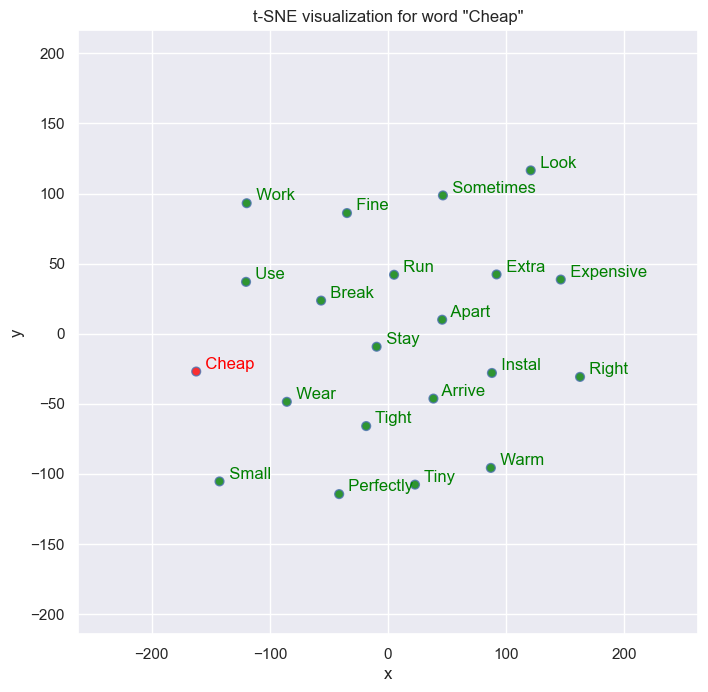

In [177]:
tsne_plot(for_word = 'cheap', w2v_model= model, item_range=20)

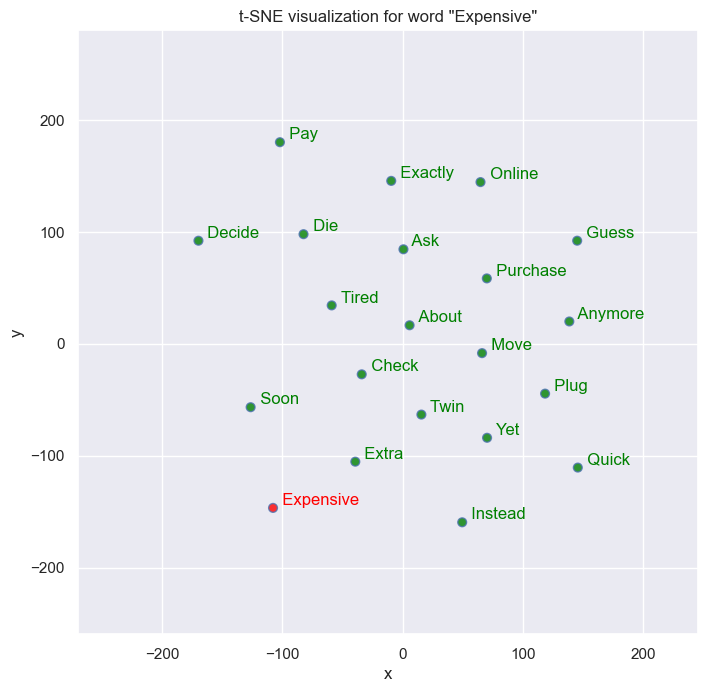

In [180]:
tsne_plot(for_word='expensive', w2v_model=model, item_range=20)

In [181]:
import plotly
import plotly.graph_objs as go

In [218]:
def get_similar_words_arrays(arrays, similar_words, model):
    for word, score in similar_words:
        word_arr = model.wv.__getitem__([word])
        arrays = np.append(arrays, word_arr, axis=0)
    return arrays

In [223]:
similar_words = model.wv.most_similar(['cheap'], topn=10)

arrays = model.wv.__getitem__(['cheap'])
arrays = get_similar_words_arrays(arrays, similar_words, model)

model_pca = PCA(n_components=10).fit_transform(arrays)
data_point = TSNE(n_components=3, random_state=0, perplexity=30).fit_transform(model_pca)

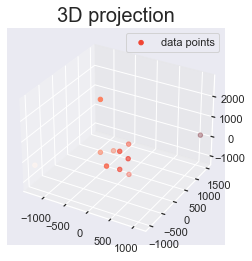

In [243]:
fig = plt.figure()
ax = fig.gca(projection='3d') # gca: get current axes

x = data_point[:, 0]
y = data_point[:, 1]
z = data_point[:, 2]

ax.scatter(x, y, z, c=x, cmap='Reds', marker="o", label='data points')
# ax.plot(x, y, z, color="gray")
ax.legend()
plt.title('3D projection', fontsize=20);

## Sentiment Analysis

In [182]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\megan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [183]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [190]:
amazon_reviewDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,Positive
1,The best soundtrack ever to anything.: I'm rea...,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive


In [188]:
nltk.download('movie_reviews');
nltk.download('punkt');

sia.polarity_scores(amazon_reviewDF.loc[3].text)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\megan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\megan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'compound': 0.9814}